<a href="https://colab.research.google.com/github/risvanisaputr/risvani-saputra-asgn-1/blob/main/PYIM_Assgn_2_PYIM009ONL009_RISVANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'/content/drive/MyDrive/dataset/kagglecatsanddogs.zip'

'/content/drive/MyDrive/dataset/kagglecatsanddogs.zip'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cp '/content/drive/MyDrive/dataset/kagglecatsanddogs.zip' './'

In [5]:
!unzip '/content/kagglecatsanddogs.zip'

Archive:  /content/kagglecatsanddogs.zip
   creating: kagglecatsanddogs/
   creating: kagglecatsanddogs/PetImages/
   creating: kagglecatsanddogs/PetImages/cat/
  inflating: kagglecatsanddogs/PetImages/cat/cat.0.jpg  
  inflating: kagglecatsanddogs/PetImages/cat/cat.1.jpg  
  inflating: kagglecatsanddogs/PetImages/cat/cat.10.jpg  
  inflating: kagglecatsanddogs/PetImages/cat/cat.100.jpg  
  inflating: kagglecatsanddogs/PetImages/cat/cat.101.jpg  
  inflating: kagglecatsanddogs/PetImages/cat/cat.102.jpg  
  inflating: kagglecatsanddogs/PetImages/cat/cat.103.jpg  
  inflating: kagglecatsanddogs/PetImages/cat/cat.104.jpg  
  inflating: kagglecatsanddogs/PetImages/cat/cat.105.jpg  
  inflating: kagglecatsanddogs/PetImages/cat/cat.106.jpg  
  inflating: kagglecatsanddogs/PetImages/cat/cat.107.jpg  
  inflating: kagglecatsanddogs/PetImages/cat/cat.108.jpg  
  inflating: kagglecatsanddogs/PetImages/cat/cat.109.jpg  
  inflating: kagglecatsanddogs/PetImages/cat/cat.11.jpg  
  inflating: kaggle

In [6]:
import math

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

In [7]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

print(tf.__version__)

Default GPU Device:/device:GPU:0
2.6.0


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip , RandomRotation


In [35]:
train_folder='/content/kagglecatsanddogs/PetImages'
val_folder='/content/kagglecatsanddogs/PetImages'


In [37]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
directory = "/content/kagglecatsanddogs"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)
class_names = train_dataset.class_names

Found 2000 files belonging to 1 classes.
Using 1600 files for training.
Found 2000 files belonging to 1 classes.
Using 400 files for validation.


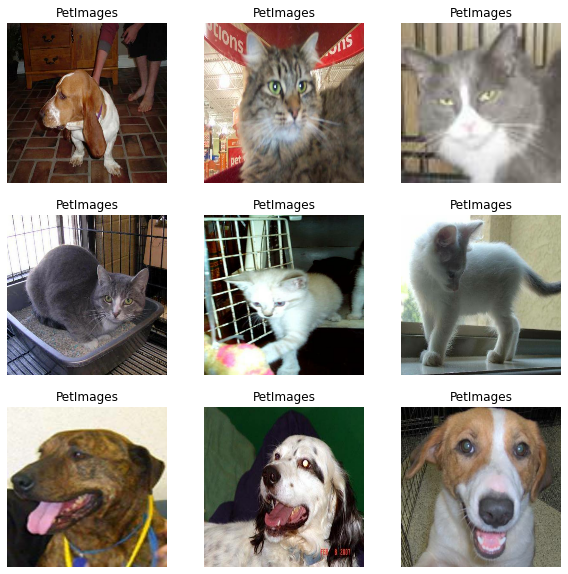

In [38]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [39]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)


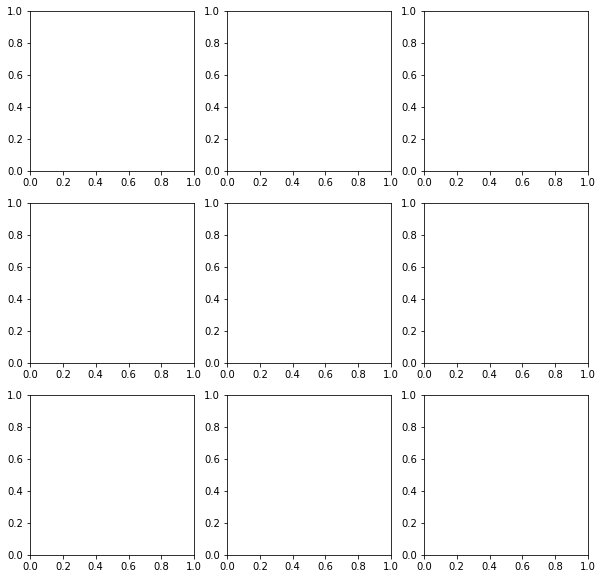

In [40]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)


In [41]:
data_dir = pathlib.Path(train_folder)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2000


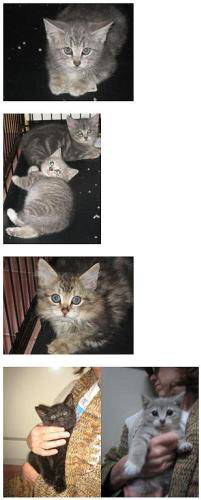

In [43]:
Cat = list(data_dir.glob('cat/*'))
PIL.Image.open(str(Cat[1]))

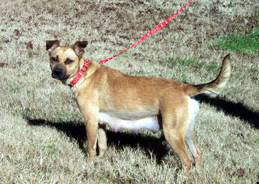

In [45]:
Dog = list(data_dir.glob('dog/*'))
PIL.Image.open(str(Dog[6]))


In [46]:
IMG_WIDTH=180
IMG_HEIGHT=180
batch_size=4
image_size=(28,28)
num_classes = 29
batch_size=32

In [47]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_folder,
    shuffle=True,
    batch_size=batch_size,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
    )

Found 2000 files belonging to 2 classes.


In [48]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  val_folder,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.


In [50]:
class_names = train_dataset.class_names
print(class_names)

['cat', 'dog']


In [52]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  break

(32, 180, 180, 3)


In [53]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [54]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [55]:
normalized_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.02686271 0.9791442


In [56]:
num_classes = 6

model = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

In [59]:
def load_image(train_folder):
  with open('jpg') as f:
    return np.array(f.read())

In [60]:
epochs=8
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

Epoch 1/8
63/63 [==============================] - 37s 111ms/step - loss: 39.2128 - accuracy: 0.5515 - val_loss: 0.4803 - val_accuracy: 0.7760
Epoch 2/8
63/63 [==============================] - 7s 104ms/step - loss: 0.4783 - accuracy: 0.7550 - val_loss: 0.3042 - val_accuracy: 0.8760
Epoch 3/8
63/63 [==============================] - 7s 103ms/step - loss: 0.2903 - accuracy: 0.8835 - val_loss: 0.1817 - val_accuracy: 0.9480
Epoch 4/8
63/63 [==============================] - 7s 102ms/step - loss: 0.1770 - accuracy: 0.9370 - val_loss: 0.1248 - val_accuracy: 0.9605
Epoch 5/8
63/63 [==============================] - 7s 105ms/step - loss: 0.0968 - accuracy: 0.9730 - val_loss: 0.0712 - val_accuracy: 0.9850
Epoch 6/8
63/63 [==============================] - 7s 103ms/step - loss: 0.0731 - accuracy: 0.9810 - val_loss: 0.0716 - val_accuracy: 0.9755
Epoch 7/8
63/63 [==============================] - 7s 105ms/step - loss: 0.0590 - accuracy: 0.9890 - val_loss: 0.0892 - val_accuracy: 0.9725
Epoch 8/8
6

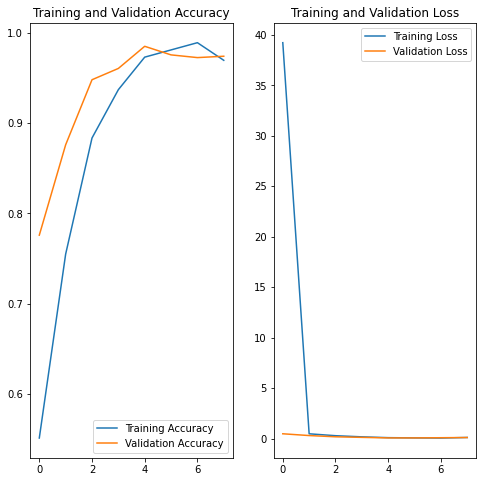

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [62]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

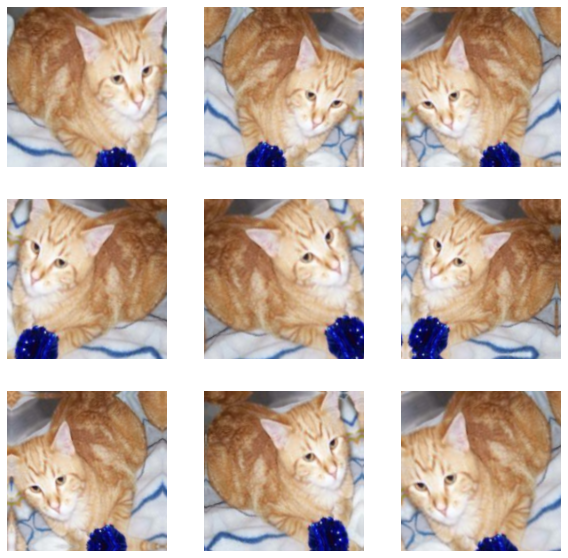

In [63]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

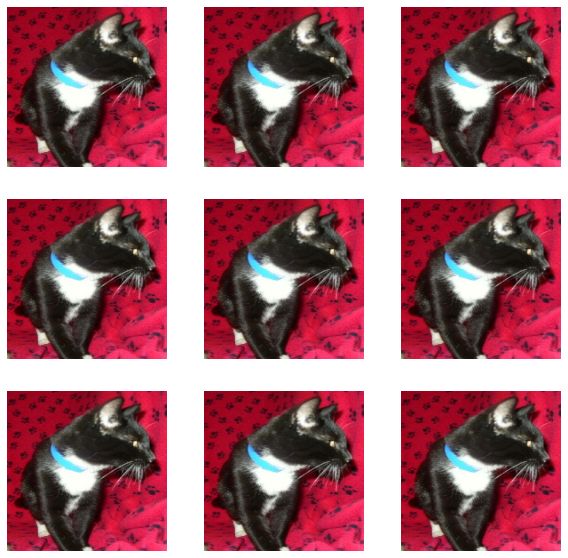

In [64]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = (tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [65]:
num_classes = 6

model_aug = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [66]:
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
epochs=8

history_aug = model_aug.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

Epoch 1/8
63/63 [==============================] - 8s 111ms/step - loss: 10.5304 - accuracy: 0.5475 - val_loss: 0.6824 - val_accuracy: 0.5790
Epoch 2/8
63/63 [==============================] - 7s 110ms/step - loss: 0.6951 - accuracy: 0.5710 - val_loss: 0.7080 - val_accuracy: 0.5410
Epoch 3/8
63/63 [==============================] - 7s 108ms/step - loss: 0.6799 - accuracy: 0.5850 - val_loss: 0.6469 - val_accuracy: 0.6180
Epoch 4/8
63/63 [==============================] - 7s 108ms/step - loss: 0.6669 - accuracy: 0.6125 - val_loss: 0.6544 - val_accuracy: 0.6305
Epoch 5/8
63/63 [==============================] - 7s 108ms/step - loss: 0.6716 - accuracy: 0.5785 - val_loss: 0.6683 - val_accuracy: 0.6260
Epoch 6/8
63/63 [==============================] - 7s 108ms/step - loss: 0.6474 - accuracy: 0.6350 - val_loss: 0.6151 - val_accuracy: 0.6510
Epoch 7/8
63/63 [==============================] - 7s 107ms/step - loss: 0.6447 - accuracy: 0.6410 - val_loss: 0.6740 - val_accuracy: 0.6425
Epoch 8/8
63

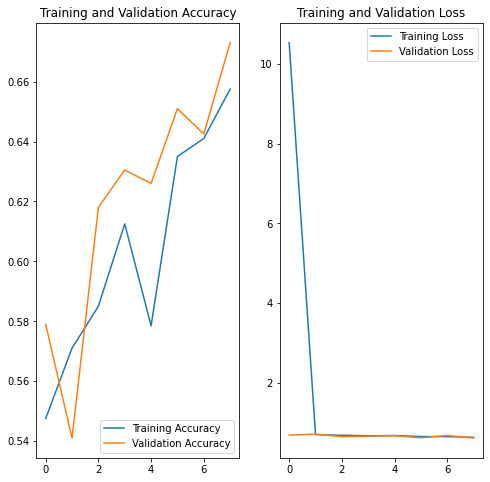

In [68]:
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']

loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()